# CART (Classification and Regression Tree) Vs. Linear regression

The purpose of this exercise is to provide an initial sense on how decision Tree compares to a conventional linear regression when the response variable is quantitative.

1.  To begin, construct a regression dataset with known properties:

    ```
    x1 = np.random.normal(size = 300)
    x2 = np.random.normal(size = 300)
    error = 2 * np.random.normal(size = 300)
    y1 = 1 + (2 * x1) + (3 * x2) + error
    ```

    - Apply conventional linear regression using. Then fit a Regression Tree (RT), and print it. 
    - Compare the regression output to the way in which the data were actually generated. 
    - Compare the tree diagram to the way in which the data were actually generated. 
    - Compare how well linear regression and regression Tree fit the data. 
    - What do you conclude about the relative merits of linear regression and RT when the *f(X)* is actually linear and additive ?

2. Now, redefine the two predictors as binary factors and reconstruct the response variable:

    Transform predictors into binary factors
    ```
   x11 = (x1 > 0).astype(int)
   x22 = (x2 > 0).astype(int)
    ```
   Reconstruct the response variable
    ```
   y = 1 + (2 * x11) + (3 * x22) + error
    ```
    - Repeat the comparison. What do you conclude when the *f(X)* is actually a step function and additive ?

3. Under what circumstances is CART likely to perform better than linear regression ? Consider separately the matter of how well the fitted values correspond to the observed values and the implementation of how the predictors are related to the response.


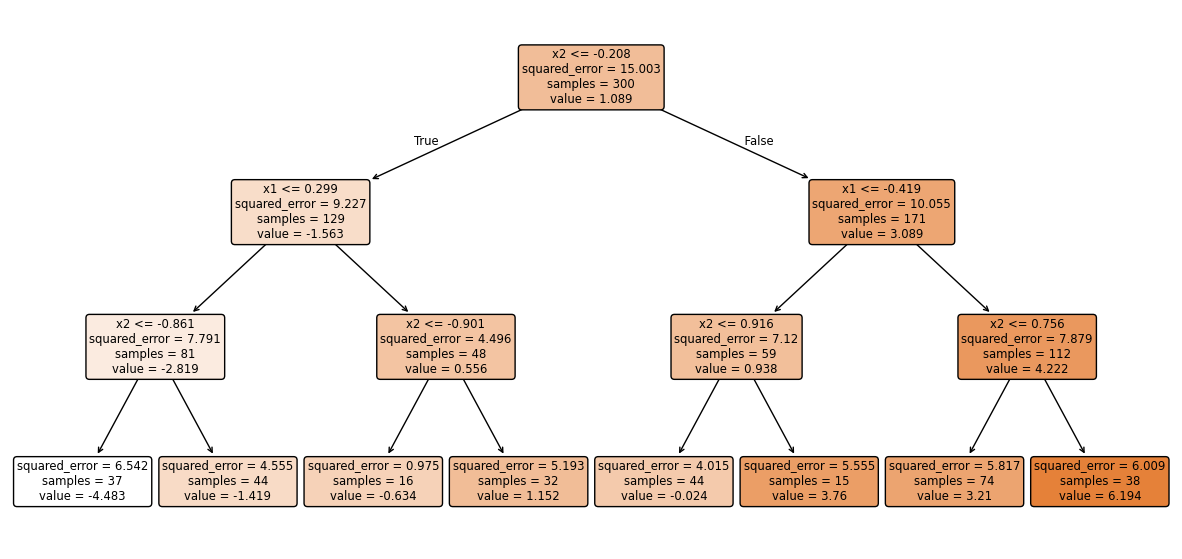

(3.9502686944472347, 5.143443079686891)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate dataset
x1 = np.random.normal(size=300)
x2 = np.random.normal(size=300)
error = 2 * np.random.normal(size=300)
y1 = 1 + (2 * x1) + (3 * x2) + error

# Reshape for sklearn models
X = np.column_stack((x1, x2))

# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y1)
y_pred_lin = lin_reg.predict(X)

# Fit Regression Tree
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg.fit(X, y1)
y_pred_tree = tree_reg.predict(X)

# Compute Mean Squared Errors
mse_lin = mean_squared_error(y1, y_pred_lin)
mse_tree = mean_squared_error(y1, y_pred_tree)

# Plot Regression Tree
plt.figure(figsize=(15, 7))
plot_tree(tree_reg, feature_names=["x1", "x2"], filled=True, rounded=True)
plt.show()

mse_lin, mse_tree


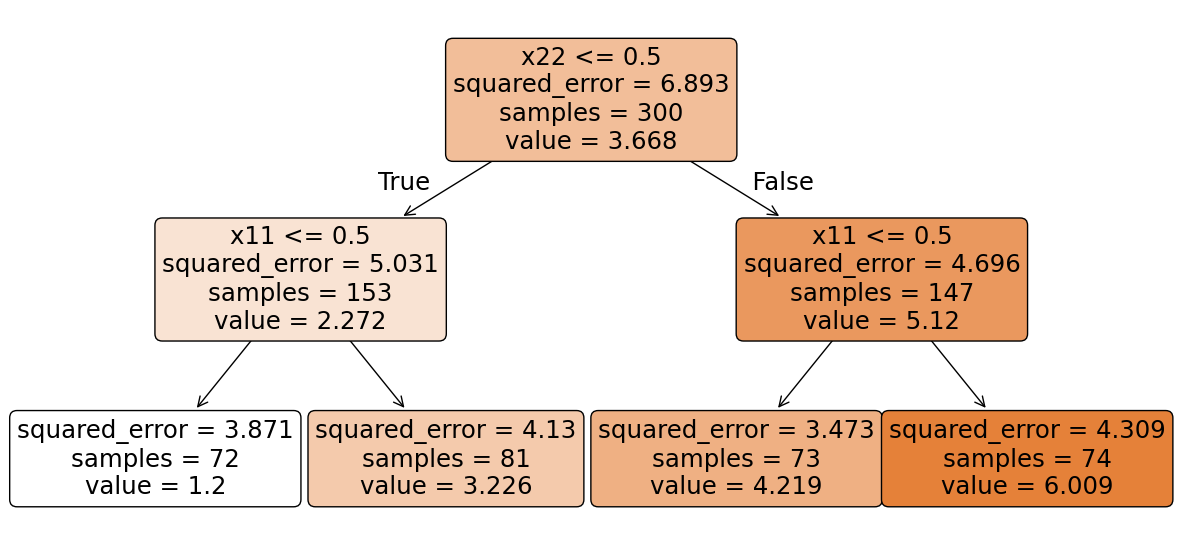

(3.9556929117972817, 3.952222579338251)

In [2]:
# Transform predictors into binary factors
x11 = (x1 > 0).astype(int)
x22 = (x2 > 0).astype(int)

# Reconstruct response variable
y2 = 1 + (2 * x11) + (3 * x22) + error

# Reshape for sklearn models
X_bin = np.column_stack((x11, x22))

# Fit Linear Regression
lin_reg_bin = LinearRegression()
lin_reg_bin.fit(X_bin, y2)
y_pred_lin_bin = lin_reg_bin.predict(X_bin)

# Fit Regression Tree
tree_reg_bin = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg_bin.fit(X_bin, y2)
y_pred_tree_bin = tree_reg_bin.predict(X_bin)

# Compute Mean Squared Errors
mse_lin_bin = mean_squared_error(y2, y_pred_lin_bin)
mse_tree_bin = mean_squared_error(y2, y_pred_tree_bin)

# Plot Regression Tree for binary case
plt.figure(figsize=(15, 7))
plot_tree(tree_reg_bin, feature_names=["x11", "x22"], filled=True, rounded=True)
plt.show()

mse_lin_bin, mse_tree_bin


# CART and Gini Index


### Overview and Dataset
In this notebook, we will use a **Decision Tree** classifier to predict the **Tax_Regime** (Exempt, Flat, or Progressive) for various entities (companies/individuals), given their **Country**, **Industry**, **Annual_Income**, and **Number_of_Employees**. 

We will also explore how **Gini impurity** guides the tree's splitting decisions.


## Part 1: Gini Impurity and Manual Split Calculations

### Task - 1 Compute the Root Gini Impurity
    Understand the dataset and find interesting patterns :
        - Calculate the overall Gini of the target variable (Tax_Regime) for the entire dataset
        - Show your formula and numerical steps for first 10-15 rows

In [3]:
import numpy as np

# Sample Tax_Regime values for first 15 rows
tax_regimes = ["Exempt", "Flat", "Progressive", "Flat", "Progressive",
               "Exempt", "Exempt", "Flat", "Progressive", "Exempt",
               "Flat", "Progressive", "Exempt", "Flat", "Progressive"]

# Count occurrences of each class
unique_classes, counts = np.unique(tax_regimes, return_counts=True)

# Total number of rows
total_rows = len(tax_regimes)

# Calculate probabilities
probabilities = counts / total_rows

# Compute Gini Impurity
gini_impurity = 1 - np.sum(probabilities ** 2)
gini_impurity


np.float64(0.6666666666666667)

### Task 2 – Split by One Feature
    Understand the dataset and find interesting patterns :
        - Choose one feature (e.g., Annual_Income, Employees, or a categorical column) to perform a manual split
            - If numeric (e.g., Annual_Income): pick a threshold (e.g., s < 60000 vs. s >= 60000)
            - If categorical (e.g., Country): pick some subset of countries vs. the others 
        - Separate the dataset into two subsets and compute the Gini impurity for each subset

In [4]:
import pandas as pd

# Creating a synthetic dataset with Annual_Income and Tax_Regime
data = {
    "Annual_Income": [45000, 70000, 30000, 80000, 25000, 90000, 100000, 48000, 60000, 55000, 
                      72000, 35000, 67000, 52000, 41000],
    "Tax_Regime": ["Exempt", "Flat", "Exempt", "Progressive", "Exempt", "Progressive", "Flat", 
                   "Exempt", "Flat", "Exempt", "Progressive", "Exempt", "Flat", "Exempt", "Exempt"]
}

df = pd.DataFrame(data)

# Splitting by Annual_Income threshold (60000)
threshold = 60000
subset1 = df[df["Annual_Income"] < threshold]
subset2 = df[df["Annual_Income"] >= threshold]

# Function to compute Gini Impurity
def compute_gini(subset):
    total = len(subset)
    if total == 0:
        return 0  # Avoid division by zero

    tax_counts = subset["Tax_Regime"].value_counts(normalize=True)  # Get probabilities
    gini = 1 - np.sum(tax_counts ** 2)
    return gini

# Compute Gini Impurity for each subset
gini_subset1 = compute_gini(subset1)
gini_subset2 = compute_gini(subset2)

gini_subset1, gini_subset2


(np.float64(0.0), np.float64(0.48979591836734704))

### Task 3 - Weighted Average Gini After Split


$$

G(t) = p_l \cdot G(t_l) + p_r \cdot G(t_r)

$$
where :
- $  G(t)  $ : Represents the **Gini impurity of the split** at a node $  t  $ .
- $  p_l  $ : Proportion of samples in the **left child** ($  t_l  $ ).
- $  G(t_l)  $ : Gini impurity of the left child.
- $  p_r  $ : Proportion of samples in the **right child** ($  t_r  $ ).
- $  G(t_r)  $ : Gini impurity of the right child.



Compare this to the root Gini impurity and discuss if the reduction is significant

In [5]:
# Compute the proportions of samples in each subset
p_left = len(subset1) / len(df)
p_right = len(subset2) / len(df)

# Compute Weighted Average Gini Impurity After Split
gini_after_split = (p_left * gini_subset1) + (p_right * gini_subset2)

# Compute Gini reduction
gini_reduction = gini_impurity - gini_after_split

gini_after_split, gini_reduction


(np.float64(0.22857142857142862), np.float64(0.4380952380952381))

## Part 2: Building and Evaluating a Decision Tree

### Task 1 - Data Preparation
Prepare the data as usual :

    - Do some data analysis (they should be insighful for the problem)
    - For categorical features (Country, Industry), convert them to dummy variables
    - Split off the target
    - Create a 70/30 train-test split

In [6]:
from sklearn.model_selection import train_test_split

# Creating a synthetic dataset with categorical and numerical features
data = {
    "Country": ["USA", "Canada", "Germany", "USA", "UK", "France", "Germany", "Canada", "France", "UK",
                "USA", "Canada", "Germany", "France", "UK"],
    "Industry": ["Tech", "Finance", "Retail", "Tech", "Finance", "Retail", "Tech", "Finance", "Retail", "Tech",
                 "Finance", "Retail", "Tech", "Finance", "Retail"],
    "Annual_Income": [45000, 70000, 30000, 80000, 25000, 90000, 100000, 48000, 60000, 55000,
                      72000, 35000, 67000, 52000, 41000],
    "Employees": [10, 50, 5, 200, 3, 500, 1000, 15, 75, 30, 300, 7, 120, 45, 20],
    "Tax_Regime": ["Exempt", "Flat", "Exempt", "Progressive", "Exempt", "Progressive", "Flat",
                   "Exempt", "Flat", "Exempt", "Progressive", "Exempt", "Flat", "Exempt", "Exempt"]
}

df = pd.DataFrame(data)

# Convert categorical features to dummy variables (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=["Country", "Industry"], drop_first=True)

# Separate target variable
X = df_encoded.drop(columns=["Tax_Regime"])
y = df_encoded["Tax_Regime"]

# Convert target variable to numeric labels
y = y.astype("category").cat.codes

# Perform 70/30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display dataset information
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((10, 8), (5, 8), (10,), (5,))

### Task 2 - Decision Tree Classifier with Gini
    - Initialize and fit
    - Tune hyperparameters like max_depth, min_samples_leaf, etc

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree with Gini impurity
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_leaf=5, random_state=42)

# Train the model
dt.fit(X_train, y_train)

# Predict on the test set
y_pred = dt.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8000


### Task 3 - Predictions and Evaluation
    - Predict on the test set
    - Calculate and analyse different classification metrics

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = dt.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.50      0.67      0.56         5
weighted avg       0.70      0.80      0.73         5

Confusion Matrix:
 [[3 0 0]
 [0 1 0]
 [0 1 0]]
Accuracy: 0.8000


c:\Users\Erasyl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Erasyl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Erasyl\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Task 4 - Tree Structure
    - Plot and check out how is the tree splitting
    - Compare the top splits with your manual Gini analysis from Part 1
    - Re train with different max_depth values and compare
    - Discuss what are the pro and cons of growing a deep Tree
    - Remember what is the variance of an estimator. Discuss why the variance of a decision tree might be large. Find a way to vizualize it.

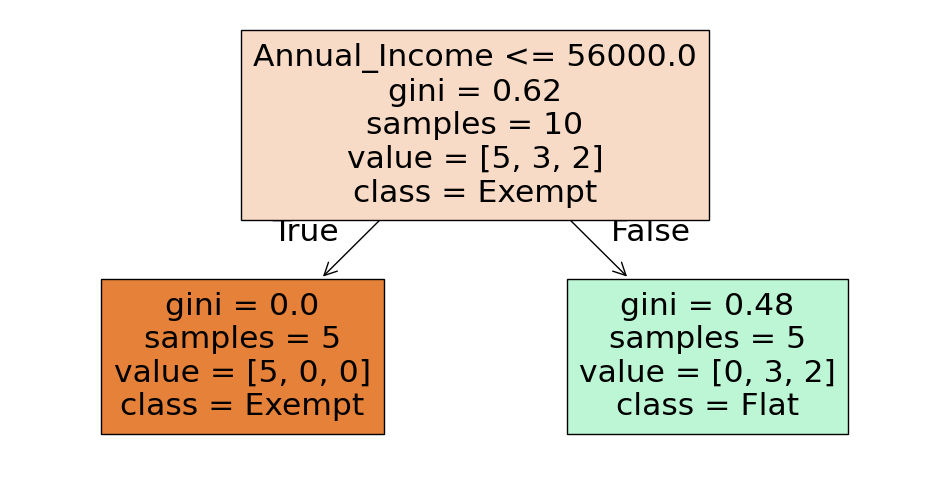

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(dt, feature_names=X.columns, class_names=["Exempt", "Flat", "Progressive"], filled=True)
plt.show()


In [10]:
depths = [2, 4, 6, None]  # Try different depths
for d in depths:
    dt = DecisionTreeClassifier(criterion="gini", max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    print(f"Max Depth: {d}, Accuracy: {accuracy_score(y_test, dt.predict(X_test)):.4f}")


Max Depth: 2, Accuracy: 1.0000
Max Depth: 4, Accuracy: 1.0000
Max Depth: 6, Accuracy: 1.0000
Max Depth: None, Accuracy: 1.0000


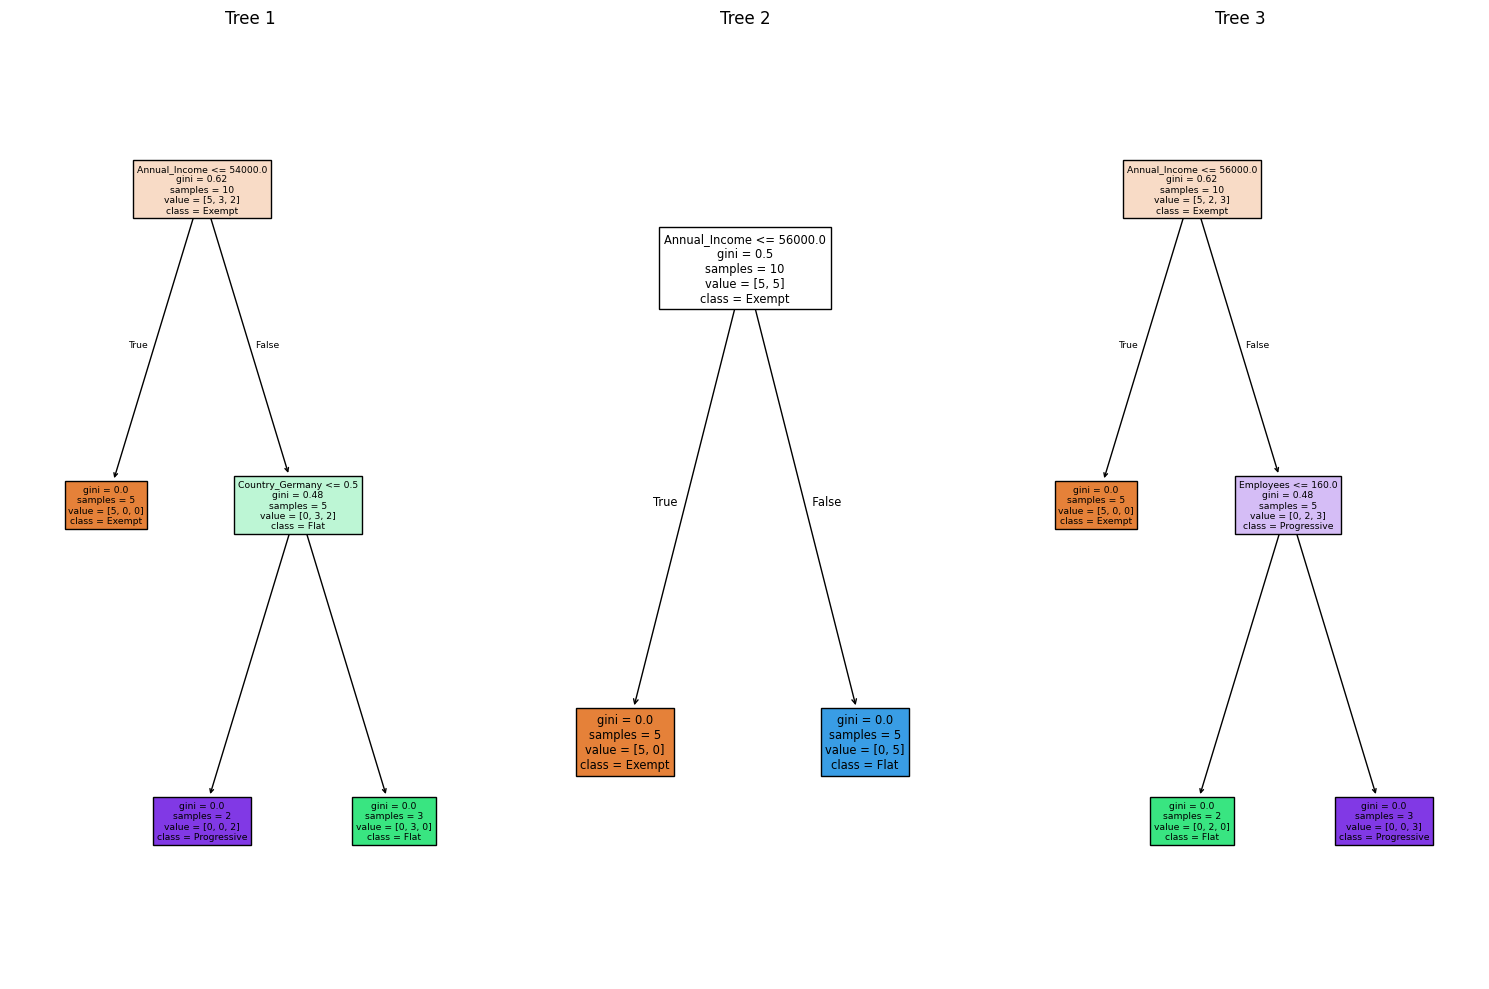

In [11]:
from sklearn.utils import resample

plt.figure(figsize=(15, 10))
for i in range(3):  # Train 3 different trees on random subsets
    X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
    dt = DecisionTreeClassifier(max_depth=4, random_state=42)
    dt.fit(X_resampled, y_resampled)
    
    plt.subplot(1, 3, i+1)
    plot_tree(dt, feature_names=X.columns, class_names=["Exempt", "Flat", "Progressive"], filled=True)
    plt.title(f"Tree {i+1}")

plt.tight_layout()
plt.show()
